In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix

2023-12-21 16:10:12.217036: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load data function

In [2]:
def load_data(filename):
    data = pd.read_csv(filename)
    X = data.drop('Revenue', axis=1) 
    y = data['Revenue']  

    return X, y

# Encoded features function

In [3]:
def encode_features(X):
    label_encoder = LabelEncoder()

    # Label encoding for 'Month'
    X['Month'] = label_encoder.fit_transform(X['Month'])

    # Label encoding for 'VisitorType'
    X['VisitorType'] = label_encoder.fit_transform(X['VisitorType'])

    return X

# Main 

Epoch 1/20
309/309 [==============================] - 3s 4ms/step - loss: 0.4445 - accuracy: 0.8318 - val_loss: 0.3523 - val_accuracy: 0.8410
Epoch 2/20
309/309 [==============================] - 1s 4ms/step - loss: 0.3080 - accuracy: 0.8643 - val_loss: 0.3126 - val_accuracy: 0.8593
Epoch 3/20
309/309 [==============================] - 1s 5ms/step - loss: 0.2810 - accuracy: 0.8845 - val_loss: 0.2948 - val_accuracy: 0.8739
Epoch 4/20
309/309 [==============================] - 1s 4ms/step - loss: 0.2679 - accuracy: 0.8944 - val_loss: 0.2896 - val_accuracy: 0.8759
Epoch 5/20
309/309 [==============================] - 1s 4ms/step - loss: 0.2608 - accuracy: 0.8957 - val_loss: 0.2806 - val_accuracy: 0.8804
Epoch 6/20
309/309 [==============================] - 1s 4ms/step - loss: 0.2567 - accuracy: 0.8973 - val_loss: 0.2760 - val_accuracy: 0.8836
Epoch 7/20
309/309 [==============================] - 1s 3ms/step - loss: 0.2533 - accuracy: 0.8975 - val_loss: 0.2757 - val_accuracy: 0.8820
Epoch 

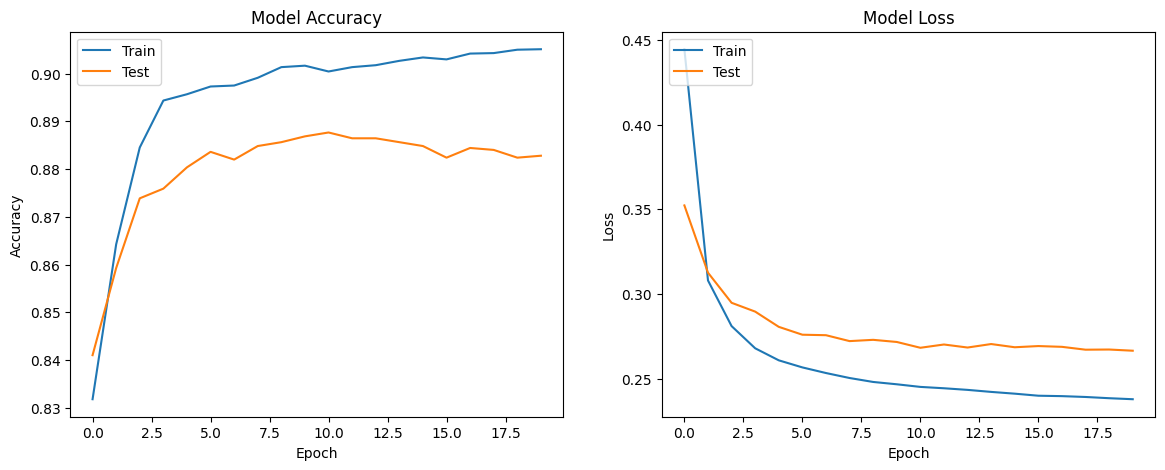

In [5]:



# Load and preprocess data
from matplotlib import pyplot as plt


X, y = load_data("dataset.csv")
X_encoded = encode_features(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train TensorFlow model
model = Sequential([
    tf.keras.Input(shape=(17,)),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
], name="my_model")

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']  # Add accuracy to the metrics to monitor
)

# Fit the model and save the history
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    validation_data=(X_test_scaled, y_test)  
)


# TensorFlow model predictions on test data
tf_predictions = model.predict(X_test_scaled)
tf_predicted_classes = (tf_predictions > 0.5).astype(int)
tf_accuracy = accuracy_score(y_test, tf_predicted_classes)
print("TensorFlow Model Accuracy:", tf_accuracy)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

# Sensitivity, Specificity and F1 score

In [ ]:
conf_matrix = confusion_matrix(tf_predicted_classes, y_test)

tn = conf_matrix[0, 0]  # True Negative
fp = conf_matrix[0, 1]  # False Positive
tp = conf_matrix[1, 1]  # True Positive
fn = conf_matrix[1, 0]  # False Negative

sensitivity = tp / (tp + fn)

specificity = tn/(tn+fp)

f1 = f1_score(tf_predicted_classes, y_test)

print("Sensitivity: {:.2f}".format(sensitivity))
print("Specificity: {:.2f}".format(specificity))
print("F1 Score: {:.2f}".format(f1))

Sensitivity: 0.71
Specificity: 0.90
F1 Score: 0.58
